# Preliminary Wrangling

Ford goBike is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.

In [282]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [283]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [284]:
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer


In [285]:
#use info to check data types and number 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [286]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

no missing values

In [287]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


After exploring the data here the changes that I will do:
* changing the duration from sec to min
* strat time and end time sould be datetime
* user type should be category
* I will extract weekdays information from start time column
* I will extract months information from start time column
* I will extract hours information from start time column


In [288]:
# Convert start time and end time to datetime
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)

In [289]:
# comvert user_type to category
df.user_type=df.user_type.astype('category')

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [333]:
# extract start time in month, weekdays and hours from start_time
df['start_time_inmonth']=df['start_time'].dt.strftime('%B')
df['start_time_inweekdays']=df['start_time'].dt.strftime('%a')
df['start_time_inhour']= df['start_time'].dt.hour

In [292]:
# Convert the duration to minutes
df['duration_min'] = df['duration_sec']/60

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [294]:
df.shape

(519700, 17)

In [295]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_inmonth,start_time_inweekdays,start_time_inhour,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,December,Sun,16,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,December,Sun,15,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,December,Sun,22,762.800000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,December,Sun,17,1036.200000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,December,Sun,14,726.716667


In [334]:
df.start_time_inweekdays.value_counts()

Tue    87865
Wed    87752
Thu    85243
Mon    81410
Fri    81165
Sat    50874
Sun    45391
Name: start_time_inweekdays, dtype: int64

In [332]:
df.start_time_inmonth.value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: start_time_inmonth, dtype: int64

# What is the structure of your dataset?
the dataset has 519700 rows and 17 columns.
* duration_sec
*  start_time
*   end_time                
*   start_station_id        
*   start_station_latitude         
*   start_station_longitude       
*   end_station_id                   
*   end_station_name              
*   end_station_latitude          
*  end_station_longitude         
*  bike_id                        
*  user_type                    
*  start_time_inmonth             
*  start_time_inweekdays            
*  start_time_inhour              
*  duration_min       

# What is/are the main feature(s) of interest in your dataset

* duration information such as the starting time of the rides.
* duration in minuets.
* user information where the user is a subsciber or a customer

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* user_type
* start_time_inmonth
* start_time_inweekdays
* start_time_inhour
* duration_min

# Univariate Exploration

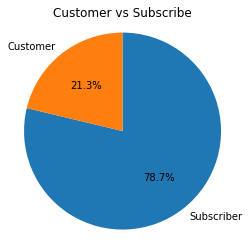

In [321]:
# see hou much the precntage of subscribers vs customers
sorted_counts = df['user_type'].value_counts()
# create pie chart for the precntage of customers and subscribers
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,autopct='%.1f%%')
plt.axis('square')
plt.title('Customer vs Subscribe');

### Observations
there's 78.7% Subscriber and 21.3% Customer

###### Now I will change the start time in month and week days to ordered categorical variable

In [339]:
# list of months in order
month_order = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
# create ordered categorical variable
df['start_time_inmonth'] = pd.Categorical(df['start_time_inmonth'],
                                         categories = month_order,
                                         ordered = True)


In [335]:
                                       
# list of months in order
order_days = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
# create ordered categorical variable
df['start_time_inweekdays'] = pd.Categorical(df['start_time_inweekdays'],
                                         categories = order_days,
                                         ordered = True)

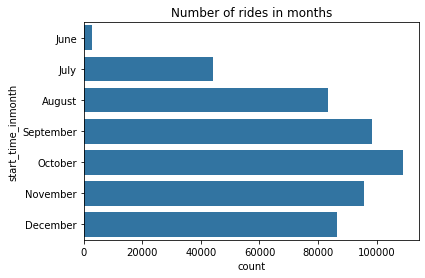

In [324]:
# Let's see the number of rides per month
base_color = sb.color_palette()[0]
# create bar chart for the number of rides per month
gr = sb.countplot(data = df, y = 'start_time_inmonth', color = base_color)
gr.set_title('Number of rides in months');

### Observations
October and septemper have the highest rides in the year, probably because it's the season 

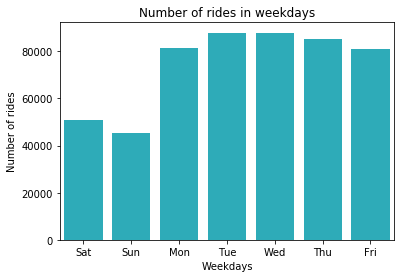

In [337]:
# Let's see the number of rides per weekdays
# list for days in order 
base_color = sb.color_palette()[9]
# create bar chart for the number of rides per weekdays
gr = sb.countplot(data = df, x = 'start_time_inweekdays', color = base_color)
plt.ylabel('Number of rides')
plt.xlabel('Weekdays')
gr.set_title('Number of rides in weekdays');

### Observations
bikes rides more often in Tue and Wed then in Thu 

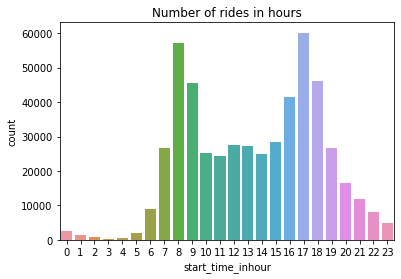

In [301]:
# the number of rides per hour
# create bar chart for the number of rides per month
gr = sb.countplot(data = df, x = 'start_time_inhour',)
gr.set_title('Number of rides in hours');


### Observations
Rides more often in 8AM and 5PM, probably because the work and school time

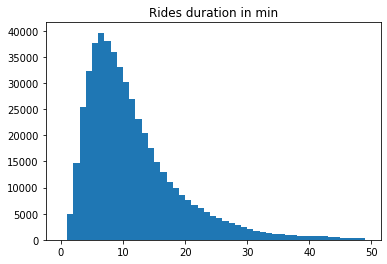

In [302]:
#The Disturbation of the duration
bins_size=np.arange(0, 50 ,1)
plt.hist(data =df, x = 'duration_min', bins=bins_size)
plt.title('Rides duration in min');

### Observations
the duration time mostly between 6-12 minutes

# Discussion

the highest number of rides was in october and septmber in months, in week days it was the week ends less number of rides than the other days, in hours the peak was in 8AM and 5PM, and the average duration time was between 6-12minutes.

as we saw the prentage of the subscribers was 78.7% and the customers was 21.3%.

in the next section I will see the diffrences between customers and subscribers in number of rides.




# Bivariate Exploration

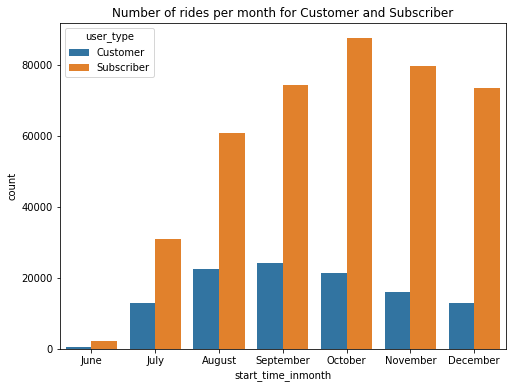

In [340]:
# let's see the number of rides for bot users
plt.figure(figsize = [8, 6])
# create bar chart for the number of rides in month for both user
gr = sb.countplot(data = df, x = 'start_time_inmonth', hue = 'user_type');
gr.set_title('Number of rides per month for Customer and Subscriber');

### Observations
September has the highest frequent rides for customer and October for Subscriber,
and June has less frequent rides for both of them.


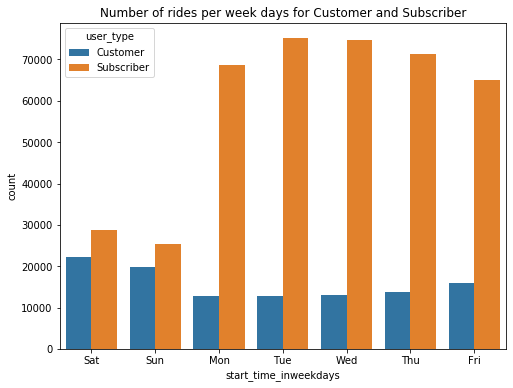

In [341]:
# let's see the number of rides per day
plt.figure(figsize = [8, 6])


# create bar chart for the number of rides in week days for both users
gr = sb.countplot(data = df, x = 'start_time_inweekdays', hue = 'user_type');
gr.set_title('Number of rides per week days for Customer and Subscriber');

### Observations
Subscribers has less bikes rides in Sun and Sat and for customers has more bikes rides in Sun and Sat, maybe because subscribers use bikes for work more than anything else and customers use it more during the weekends just for fun.

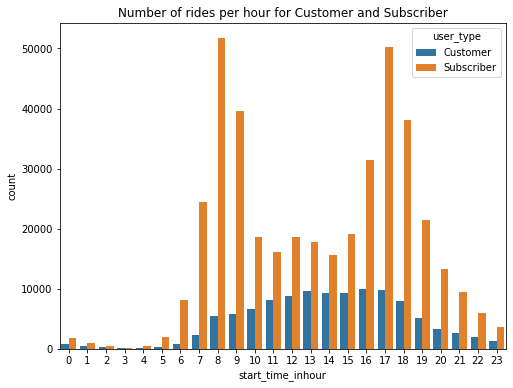

In [270]:
# the number of rides per hour
plt.figure(figsize = [8, 6])
# Create bar chart for the number of rides in hours for bothe users
gr = sb.countplot(data = df, x = 'start_time_inhour', hue = 'user_type');
gr.set_title('Number of rides per hour for Customer and Subscriber');

### Observations
Subscribers in 8AM and 5PM take more rides, maybe because it the work time, and customers take rides more in 12PM to 5PM, maybe because the most of the customers are  tourist or people that are just enjoying of thier time.

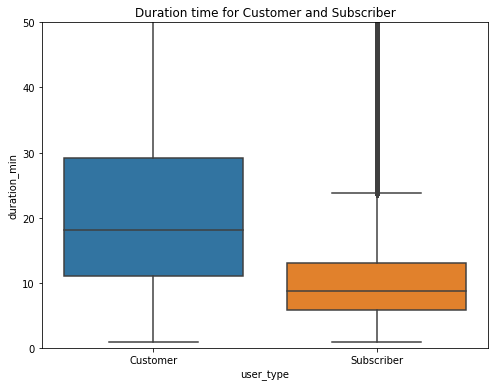

In [271]:
# Bix plot for the duration time for both users
plt.figure(figsize = [8, 6])

gr = sb.boxplot(data = df, x = 'user_type', y = 'duration_min')
gr.set_title('Duration time for Customer and Subscriber');
plt.ylim(0,50);


### Observations
the mean duration for the customers in more that subscribers, again maybe the most of the customers are tourist or people that are just enjoying of thier time and subscribers use it for works.

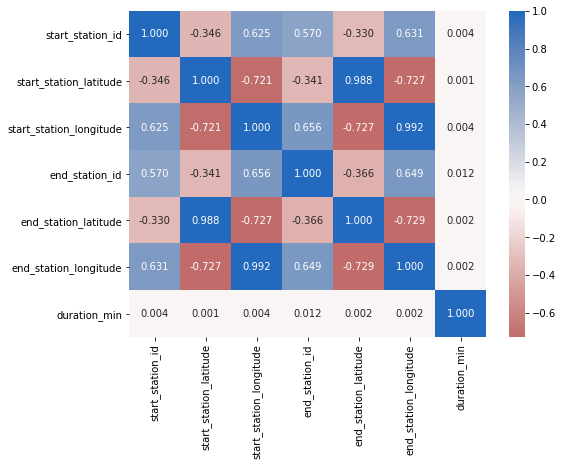

In [272]:
# all the interactions between numaric varables 
df_numeric = [ 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'duration_min']
plt.figure(figsize = [8, 6])
sb.heatmap(df[df_numeric].corr(), cmap = 'vlag_r', fmt = '.3f',annot = True, center = 0);


### Observations
The correlation cofficients indicate there might be correlations between some variables, and there are no strong evidences to support these


# Discussion

For the subscribers october it was the highes number of rides and september fir the customers, and subscribers has the lowest number of rides in the weekends but in the other hand customers has the highest number of rides in the weekends, this probably most of the customers are just people enjoyng in their time in the weekends and the subscribers use the rides for work or school the and there's a strong evdince ffor that, the rush hours for the subscribers in 8AM and 5PM which is swork time, and for the customers the rush hours from 1PM to 6pm where the weather is good and it's a good time for bikes rides, and the customers have highest average duration time that the subscribers.

in the next section we will try to know the highest duration time for customers and subscribers in months, week days and hours.

# Multivariate Exploration

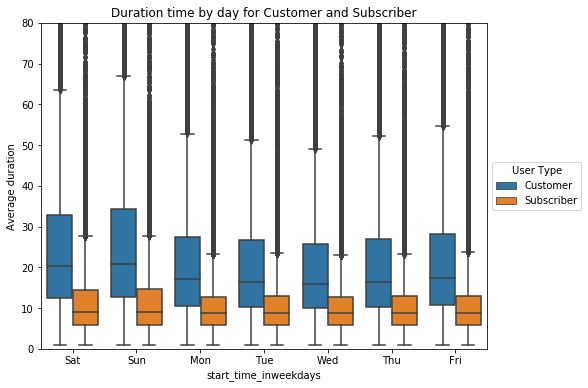

In [342]:
# the average duration time per users in week days
plt.figure(figsize = [8, 6])
# create box plot for the average duration time for both users in week days.
gr = sb.boxplot(data = df, x= 'start_time_inweekdays', y='duration_min', hue = 'user_type', dodge = True)
plt.ylim(0,80)
gr.set_title('Duration time by day for Customer and Subscriber')
plt.ylabel('Average duration')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title="User Type", title_fontsize = 10);


### Observations
Sun and Sat has an average duration for customers more that the other week days, maybe because the most of the customers are tourist or people that are just enjoying of the weekends, for subscribers the there is no differnces the average durations 

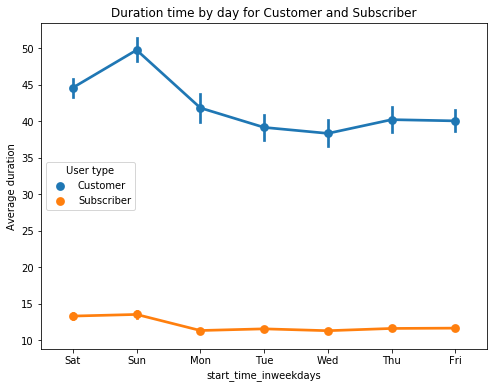

In [343]:
# the average duration time per users in week days
plt.figure(figsize = [8, 6])
# create point plot for the average duration for both users in week days
gr = sb.pointplot(data = df, x='start_time_inweekdays', y='duration_min', hue='user_type',height=5)
gr.set_title('Duration time by day for Customer and Subscriber')
plt.ylabel('Average duration')
plt.legend(loc='center left',title='User type', title_fontsize = 10);

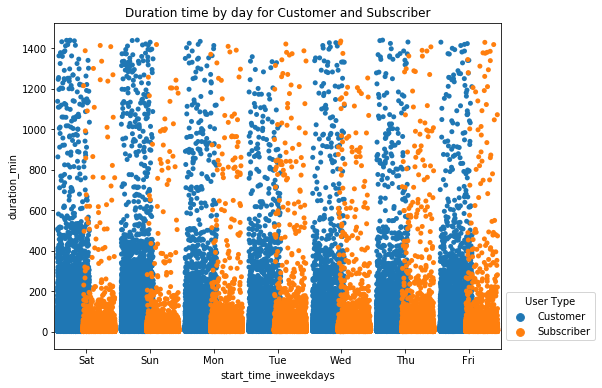

In [344]:
# the average duration time per users in week days
plt.figure(figsize = [8, 6])
# create strip plot for the average duration for both users in week days
gr = sb.stripplot(data = df, x = "start_time_inweekdays", y = "duration_min", hue = "user_type", jitter = 0.5, dodge = True)
gr.set_title('Duration time by day for Customer and Subscriber')

plt.legend(loc='center left', bbox_to_anchor=(1,0.10),title="User Type", title_fontsize = 10);

### Observations
the higher values of average duration time in weekends for the customers and for the subscribers it's almost the same, this probably because most of the customers are just people having fun

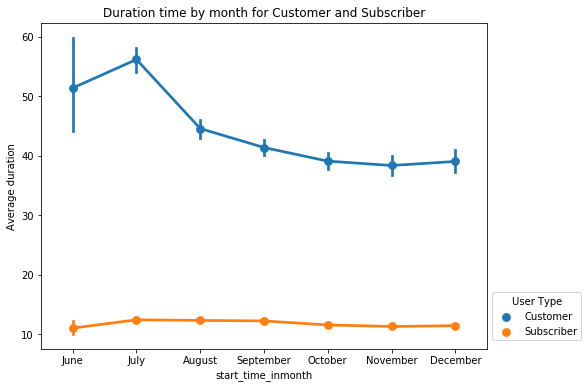

In [345]:
# the average duration time per users in months
plt.figure(figsize = [8, 6])
# Create point plot for the average duration for both users in months
gr = sb.pointplot(data = df, x='start_time_inmonth', y='duration_min', hue='user_type',height=5)
gr.set_title('Duration time by month for Customer and Subscriber')
plt.ylabel('Average duration')
plt.legend(loc='center left',title="User Type", title_fontsize = 10,bbox_to_anchor=(1,0.10) );

### Observations
the higher values of average duration time in July and June for customers and in September and July for subscribers, but in genral line plot is more stable for the subscribers.

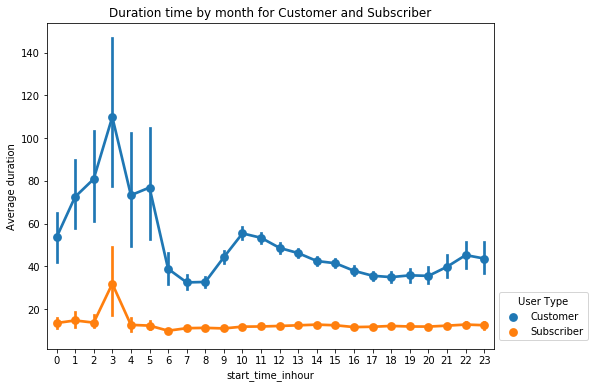

In [277]:
# the average duration time per users in hours
plt.figure(figsize = [8, 6])
# Create point plot for the average duration for both users in hours
gr = sb.pointplot(data = df, x='start_time_inhour', y='duration_min', hue='user_type',height=5)
gr.set_title('Duration time by month for Customer and Subscriber')
plt.ylabel('Average duration')
plt.legend(loc='center left',title="User Type", title_fontsize = 10,bbox_to_anchor=(1,0.10) );

# Conclustion

The highest average duration time for customers in july and june, and september and july for subscribers, in week days both of them the highest duration time in the weekends, this probably because they rides in the weekends just for fun and enjoying in their time but in genral subscribers less that customers in the average duration time in all the time and this also a strong evdince that customers rides for fun and subscribers use it for the work or school 



In [346]:
df.to_csv('df_final.csv')